In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#We will be using the Palmer Penguins dataset
#lets read in the dataset


In [3]:
df=pd.read_csv('penguins_size.csv')

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
#There are 7 columns and 344 rows 
#species , island,sex are of object i.e strings

In [7]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [8]:
#There are 3 species of penguins , now we will try to predict the species 
#from the features present

In [9]:
# Note there are some missing data , hence we will have to perform some feature
#engineering

In [10]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [11]:
#These are the missing values in the columns 

In [12]:
df.head(20)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [13]:
df.tail(20)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
325,Gentoo,Biscoe,46.8,16.1,215.0,5500.0,MALE
326,Gentoo,Biscoe,41.7,14.7,210.0,4700.0,FEMALE
327,Gentoo,Biscoe,53.4,15.8,219.0,5500.0,MALE
328,Gentoo,Biscoe,43.3,14.0,208.0,4575.0,FEMALE
329,Gentoo,Biscoe,48.1,15.1,209.0,5500.0,MALE
330,Gentoo,Biscoe,50.5,15.2,216.0,5000.0,FEMALE
331,Gentoo,Biscoe,49.8,15.9,229.0,5950.0,MALE
332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,FEMALE
333,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,MALE


In [14]:
#Here row 3 has all features to NULL , so it will be wise to drop them 
#Also we have very small percentage of missing data, so it is no harm 
#to drop rows having null values


In [15]:
df=df.dropna()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [17]:
#We dropped 10 rows , there were total of 10 unique rows with null values

In [18]:
 df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [19]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [20]:
#Another case of missing data

In [21]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [22]:
# The sex is not mentioned 
# We will estimate the sex in this case instead of dropping this
# We will find the average body_mass_g and then classify its sex based on
#the body weight

In [26]:
df[df['species']=='Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [27]:
# We check the mean and deviation and can hopefully predict that 
#The penguin is a female,so we make the changes

In [28]:
df.at[336,'sex']='FEMALE'

In [29]:
df.tail(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
333,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,MALE
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,FEMALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,FEMALE
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [30]:
# We made the changes

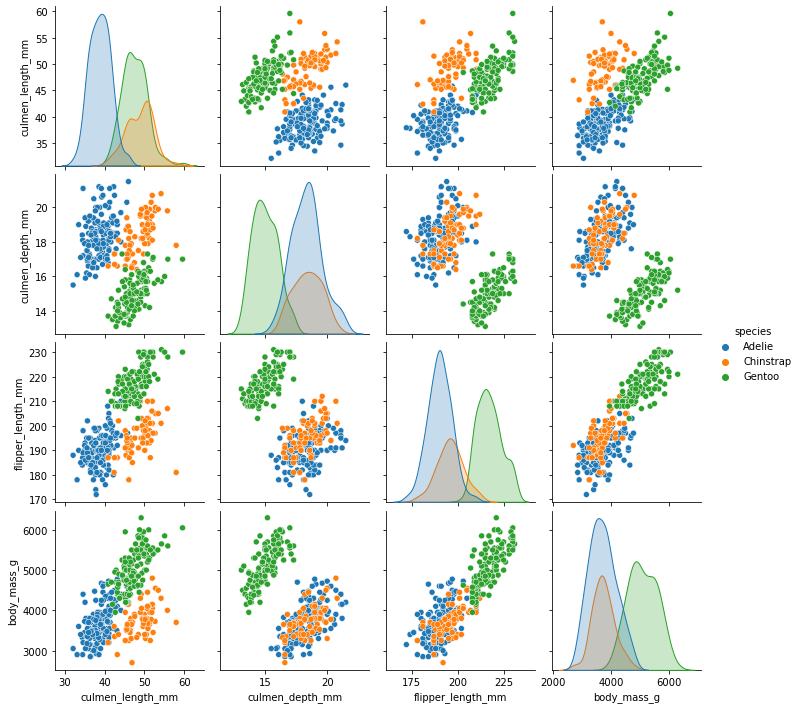

In [31]:
sns.pairplot(df,hue='species')

In [32]:
#The pairplot shows that species are differntiated by their features in majority cases

In [33]:
#As tree based models dont work with multi categories with strings
#so we will create dummies, like encoding

In [34]:
X=pd.get_dummies(df.drop('species',axis=1),drop_first=True)

In [35]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [36]:
y=df['species']

In [37]:
from sklearn.model_selection import train_test_split


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
model=DecisionTreeClassifier()

In [41]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
base_predictions=model.predict(X_test)

In [43]:
base_predictions

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adel

In [44]:
y_test

202    Chinstrap
315       Gentoo
141       Adelie
200    Chinstrap
299       Gentoo
         ...    
263       Gentoo
89        Adelie
210    Chinstrap
23        Adelie
317       Gentoo
Name: species, Length: 101, dtype: object

In [45]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [46]:
print(classification_report(y_test,base_predictions))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



In [47]:
#Thus the model has a good prediction ability 

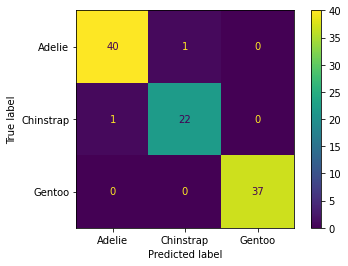

In [48]:
plot_confusion_matrix(model,X_test,y_test)

In [49]:
# 2 penguins are being misclassified

In [50]:
model.feature_importances_

array([0.32591819, 0.04203954, 0.54282921, 0.        , 0.0681854 ,
       0.01017467, 0.01085298])

In [51]:
# This shows the weightage of the different features as evaluated by our model

In [52]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.325918
culmen_depth_mm,0.042040
flipper_length_mm,0.542829
body_mass_g,0.000000
island_Dream,0.068185
island_Torgersen,0.010175
sex_MALE,0.010853


In [53]:
# The respective features and their importances

In [54]:
# Now we will visualise the decision tree using plot_tree

In [55]:
from sklearn.tree import plot_tree

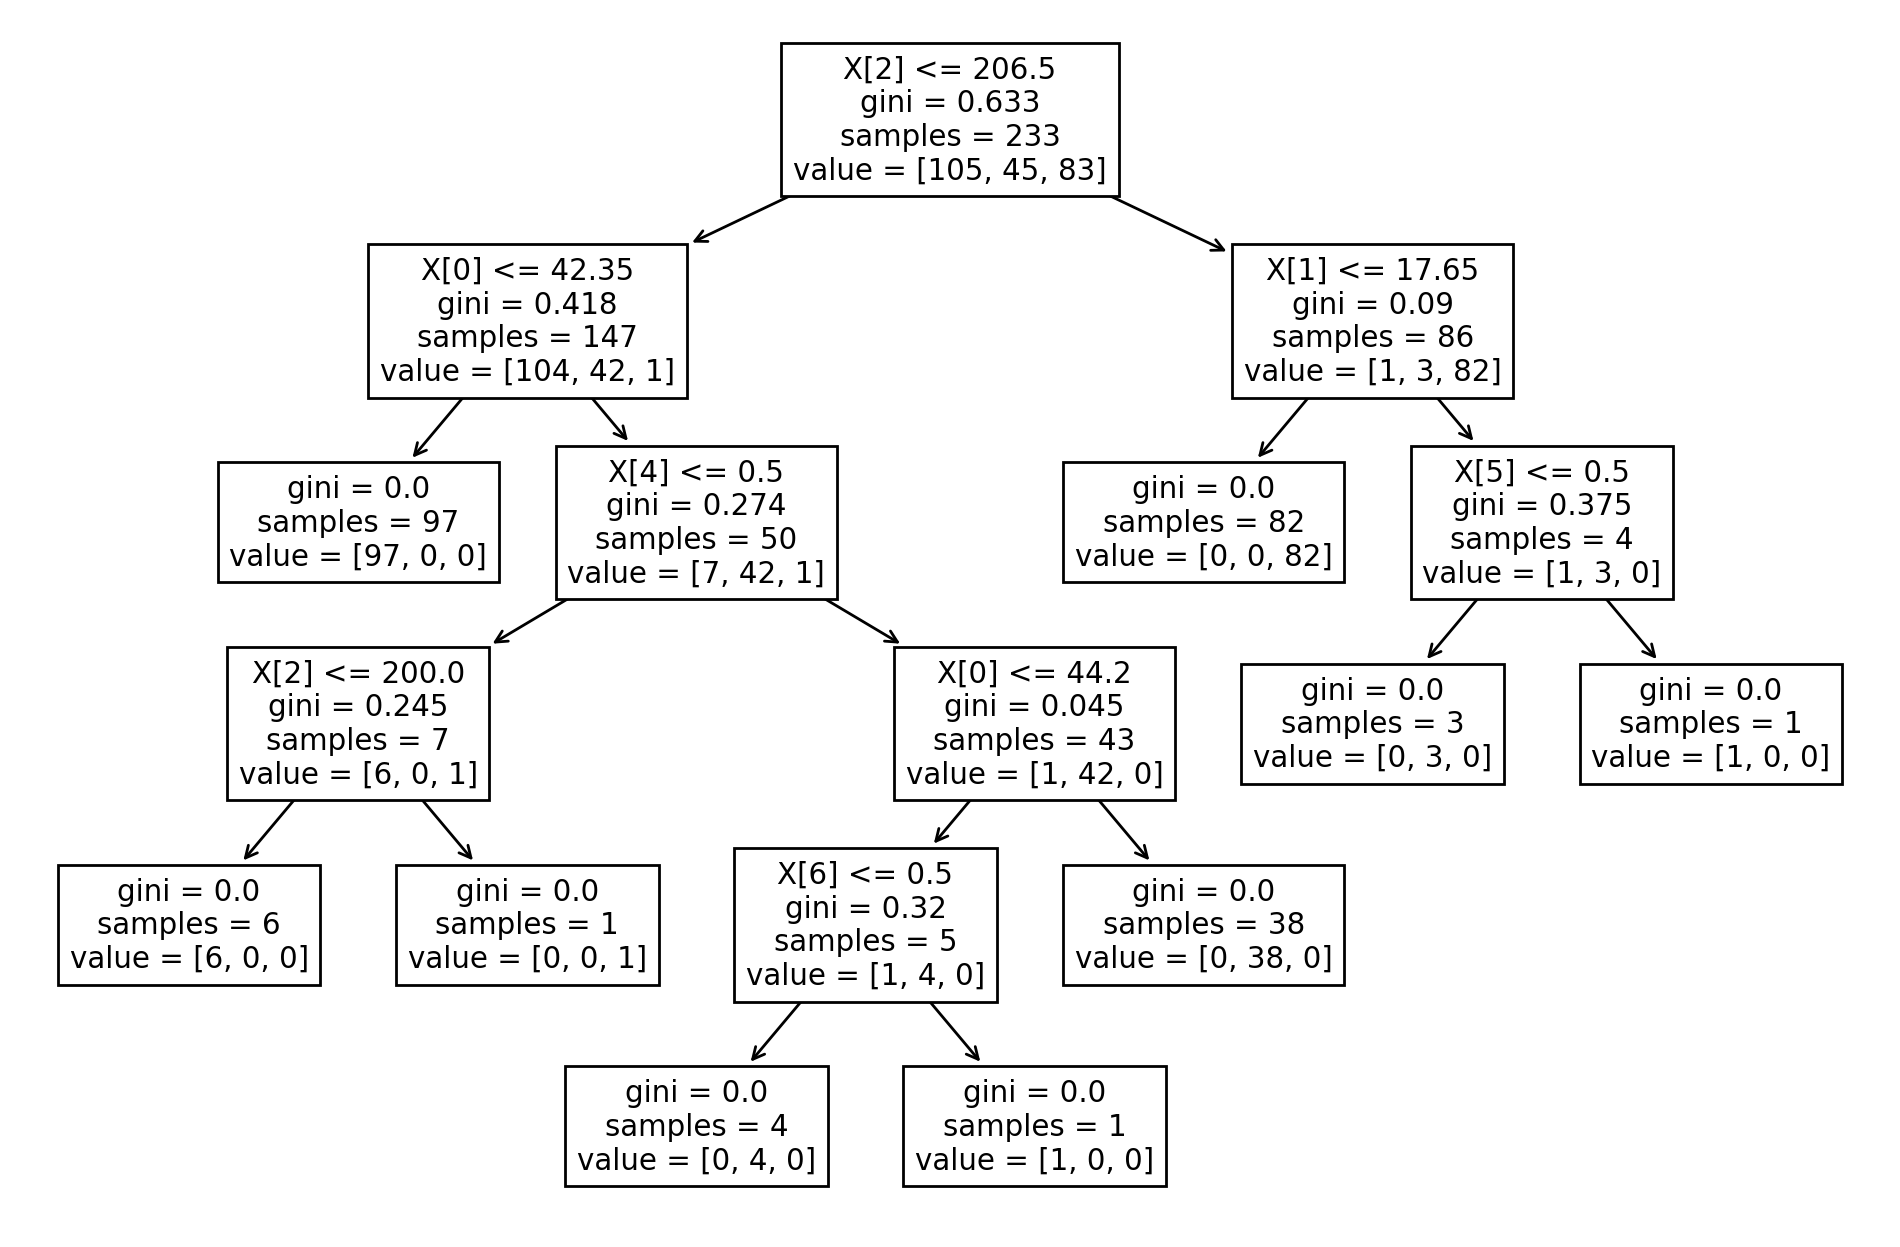

In [56]:
plt.figure(figsize=(12,8),dpi=200)
plot_tree(model);

In [57]:
# X[2] is the 'flipper_length_mm' which is the feature
#with the most important feature

In [58]:
# gini refers to the gini index
#233 samples enter the model 
# and they are separated into species as value=[105,45,83] and so on


In [59]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

In [60]:
# this will show the decision tree and how it changes with different parameters

In [61]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [62]:
# We will restrict the tree depth and then check the performance

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101





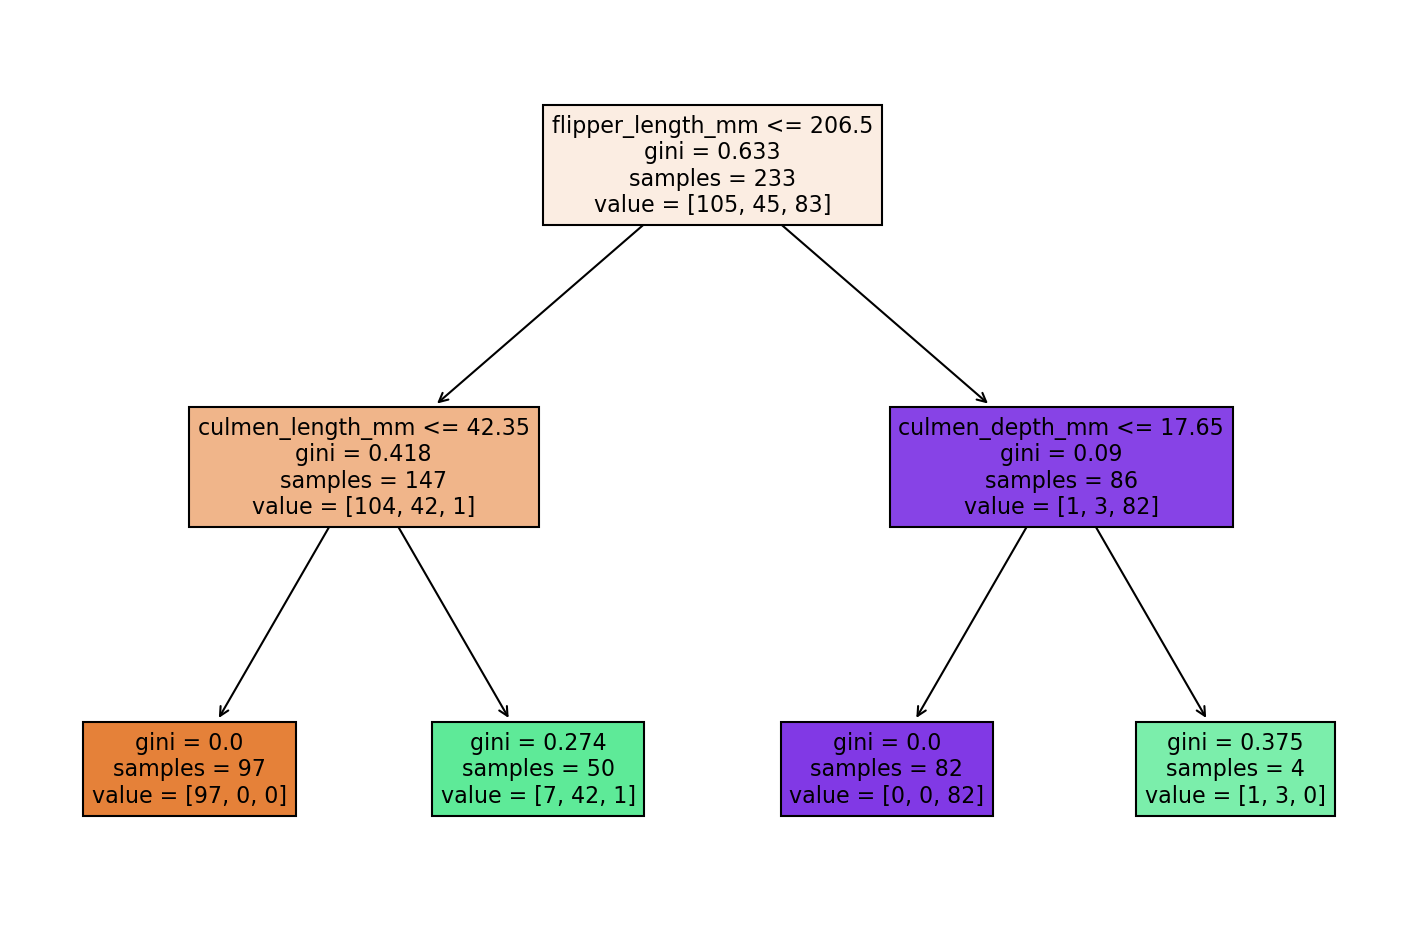

In [63]:
report_model(pruned_tree)

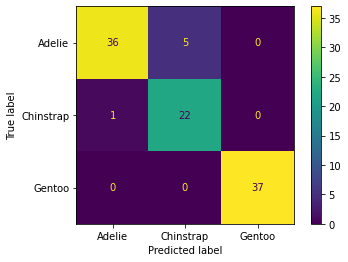

In [64]:
plot_confusion_matrix(pruned_tree,X_test,y_test)

In [65]:
# See how the performance decreased , but now the model is more simple

In [66]:
#Now lets save the model

In [67]:
from joblib import dump,load

In [68]:
dump(model,'pengiuin_species_predictor')

['pengiuin_species_predictor']